# Hands-On
---

Hands-On ini digunakan pada kegiatan Workshop Data Science 2022, Universitas Gunadarma

# Tugas Mandiri Pertemuan 16
---
Pertemuan 16 (enambelas) pada Workshop Data Science 2022 menyampaikan materi mengenai Membangun model: Evaluasi. silakan Anda kerjakan Latihan 1 s/d 5. Output yang anda lihat merupakan panduan yang dapat Anda ikuti dalam penulisan code :)

<h1> Soal 1: Pemahaman Tentang Model Evaluasi</h1>

Jawab pertanyaan di bawah ini dengan bahasa masing-masing?

1. Apa perbedaan antara data latih, data validasi, dan data test?
2. Bagaimana cara kita menilai performa suatu model?
3. Apa itu Confusion Matrix? Jelaskan secara lengkap!
4. Apa itu Classification Report dari sklearn?

**JAWABAN**
 <p style="color:#FF0000">Jawab:</p>
1.  - **Data Training,** seperti namanya, data yang digunakan untuk training model. 
    - **Data Validation,** digunakan untuk proses validasi model dan mencegah overfitting.
    - **Data Testing,** digunakan untuk testing model, sebagai simulasi penggunaan model pada dunia nyata. Data testing tidak boleh pernah dilihat oleh model sebelumnya.

2. Banyak cara lain yang dapat digunakan untuk menilai performa dari suatu model, diantaranya:

 - **Klasifikasi** (classification metrics): accuracy, precision, recall, F1-score, ROC, AUC, dan lainnya.
 - **Regresi** (regression metrics) : MSE, MAE, dan lainnya.
 - **Clustering** (clustering metrics): Silhouette Coefficient, Davies-Bouldin Index, Dunn Index, dan lainnya.

3. **Confusion Matrix** adalah pengukuran performa untuk masalah klasifikasi machine learning dimana keluaran dapat berupa dua kelas atau lebih.  Confusion Matrix adalah tabel dengan 4 kombinasi berbeda dari nilai prediksi dan nilai aktual. Ada empat istilah yang merupakan representasi hasil proses klasifikasi pada confusion matrix yaitu True Positif, True Negatif, False Positif, dan False Negatif. 

4. **Classification Report** digunakan untuk mengukur kualitas prediksi dari algoritma pengklasifikasian.


---

<h1>Soal 2: Aplikasi Model Evaluasi</h1>

Kali ini kita akan menggunakan data untuk memprediksi kelangsungan hidup pasien yang telah mengalami operasi payudara. Dengan informasi yang dimiliki terkait pasien, kita akan membuat model untuk memprediksi apakah pasien akan bertahan hidup dalam waktu lebih dari 5 tahun atau tidak.

Lebih Lengkapnya kalian bisa membaca informasi tentang dataset di link berikut: https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.names

Buat model Klasifikasi (Model/Algoritma Bebas) untuk memprediksi status pasien dengan ketentuan sebagai berikut:

1. Bagi kedua data ini menjadi data training dan data test dengan test_size=0.25.
3. Pelajar tentang metrics roc_auc_score kemudian buatlah model dan evaluasi dengan menggunakan teknik cross-validation dengan scoring 'roc_auc'. Baca https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html untuk menggunakan metric roc_auc saat cross-validation.
3. Berapa score rata2 dari model dengan teknik cross-validation tersebut?
4. Prediksi data test dengan model yang telah kalian buat!
5. Bagaimana hasil confusion matrix dari hasil prediksi tersebut?
6. Bagaimana classification report dari hasil prediksi tersebut?
5. Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status positive?
6. Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status negatif?

### Load Dataset 

In [4]:
# import library pandas
import pandas as pd

# Load Dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df = pd.read_csv(url, names=list_cols)

In [5]:
# tampilkan 5 baris awal dataset dengan function head()
df.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
# hitung jumlah masing" data pada kolom survival_status
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

### Build Model

In [7]:
#import library train test split dan cross val
from sklearn.model_selection import train_test_split, cross_val_score

#import library Logistic regression
from sklearn.linear_model import LogisticRegression

#import library roc auc score
from sklearn.metrics import roc_auc_score

#import library scale
from sklearn.preprocessing import scale

#import library numpy
import numpy as np

In [8]:
## pemisahan feature dan target (data target : 'survival_status')
X = df.drop('survival_status', axis = 1)
Xs = scale(X)
y = df['survival_status']

#### NO 1

In [9]:
## pemisahan variabel test dan train dari data Xs dan y
# test size= 25%, random state = 42, dan stratify = y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42, stratify=y)

In [10]:
## pembuatan objek model
model_logReg = LogisticRegression(random_state = 42)

## latih model
model_logReg.fit(X_train, y_train)

## prediksi.
y_predict = model_logReg.predict(X_test)

#### NO 2

In [11]:
## menghitung cross_val_score dengan scoring = 'roc_auc'
## parameter cv = 10 
score = cross_val_score(model_logReg, X, y, scoring = 'roc_auc', cv = 10)
print(score)

[0.44021739 0.80978261 0.67391304 0.69021739 0.70380435 0.79292929
 0.875      0.62784091 0.67613636 0.61363636]


#### NO 3

In [12]:
# cetak rata-rata nilai rata-rata auc score
score.mean()

0.6903477711901624

#### NO 4

In [17]:
# Prediksi data test dengan model yang telah kalian buat 
auc_score = roc_auc_score(y_test, y_predict)
auc_score

0.5311403508771929

#### NO 5

In [18]:
# import library confusion matrix dan classification report
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
# apply confusion matrix dan cetak nilai confusion matrix
cm = confusion_matrix(y_test, y_predict, labels = [1,2])
cm

array([[52,  5],
       [17,  3]])

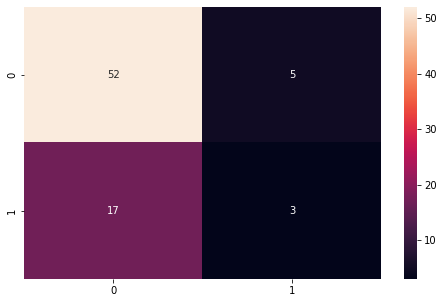

In [29]:
# visualisasikan nilai confusion matrix ke dalam diagram heatmap
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt=".0f", ax=ax)
plt.show()

#### NO 6

In [26]:
# cetak nilai classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.75      0.91      0.83        57
           2       0.38      0.15      0.21        20

    accuracy                           0.71        77
   macro avg       0.56      0.53      0.52        77
weighted avg       0.66      0.71      0.67        77



#### NO 7

- Bagaimana hasil confusion matrix dari hasil prediksi tersebut? <br>
 *jawab disini* : hasil dari confusion matrix dari hasil prediksi TP = 52, TN = 3, FP = 17, FN = 5
 
 
- Bagaimana classification report dari hasil prediksi tersebut? <br>
 *jawab disini* : hasil akurasi memiliki nilai 71%, precision memiliki nilai 75%, recall memiliki nilai 91% dan f1-score memiliki nilai 83% dari hasil prediksi
 
 
- Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status positive? dari hasil classification_report diatas <br>
 *jawab disini* : cukup baik dengan memiliki tingkat akurasi, presisi dan recall masing masing 71%, 75%, dan 91%
 
 
- Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status negatif? dari hasil classification_report diatas<br>
 *jawab disini* : cukup baik dengan memiliki tingkat akurasi, presisi dan recall masing masing 71%, 75%, dan 91%

---

<h1> Soal 3: Pemahaman Tentang Model Selection</h1>

Jelaskan dengan bahasa sendiri!

1. Apa itu Bias dan Variance?
2. Apa itu Overfitting dan Underfitting?
3. Apa yang bisa kita lakukan untuk mengatur kompleksitas dari model?
4. Bagaimana model yang baik?
5. Kapan kita menggunakan GridSearchcv dan kapan menggunakan RandomizedSearchCV?


 <p style="color:#FF0000">Jawab</p>
1.  
 
*   Bias adalah perbedaan antara rata rata hasil prediksi dari model ML yang kita develop dengan data nilai yang sebenarnya.
*   Variance adalah variabel dari prediksi model untuk data tertentu dimana memberikan kita informasi perserbaran data kita.

2. 
 
*   Overfitting adalah suatu keadaan dimana data yang digunakan untuk pelatihan itu adalah yang "terbaik". 
*   Underfitting adalah suatu keadaan dimana model pelatihan data yang dibuat tidak mewakilkan keseluruhan data yang akan digunakan nantinya.


3.  Meningkatkan jumlah data yang tersedia untuk dianalisis dan algoritma perhitungan untuk melakukan analisis secara presisi dan akurat

4. Model yang baik adalah model yang mampu menjelaskan data yang ada. Biasanya kriteria ini dikaji melalui uji keserasian atau goodness of fit. Salah satu ukuran yang sering digunakan untuk mendukung kriteria ini adalah koefisien determinasi (R2) khususnya bila peneliti menggunakan analisis regresi linier.

5. GridSearchcv dan RandomizedSearchCV adalah dua metode paling populer untuk optimasi hyper-parameter dari model apa pun. Dalam kedua kasus, tujuannya adalah untuk menguji seperangkat parameter yang jangkauannya telah ditentukan oleh pengguna, dan mengamati hasilnya dalam hal metrik yang digunakan (akurasi, presisi…).


---

<h1> Soal 4: Aplikasi Model Selection</h1>

1. Bagi kedua data berikut ini menjadi data training dan data test dengan test_size=0.25.
2. Import library KNN dan GridSearchCV.
3. Gunakan algoritma KNN dan fungsi GridSearchCV untuk hyperparameter tuning dan model selection.
4. jumlah fold bebas!, gunakan scoring 'roc_auc'
5. Definisikan kombinasi hyperparameter untuk model selection dengan GridSearchCV. kombinasi Hyperparameter bebas, baca lagi dokumentasi KNN di link berikut https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html untuk memahami lagi jenis2 hyperparameter di algorithma KNN.
6. Latih model terhadap data training.
7. Apa hyperparameter terbaik untuk kombinasi hyperparameter kalian?
8. Berapa score validasi terbaik dari model tersebut?
9. Prediksi probabilitasi output dari model yang telah di buat terhadap data test. note : gunakan method .predict_proba() untuk menghasilkan output probabilitas

10. Berapa nilai score roc_auc untuk data test? (y_predict)
11. Apakah model anda termasuk baik, overtting, atau underfitting?


### Load Dataset 

In [30]:
# import library pandas
import pandas as pd

# Load Dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df2 = pd.read_csv(url, names=list_cols)

In [31]:
# tampilkan 5 baris awal dataset dengan function head()
df2.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [32]:
# hitung jumlah masing" data pada kolom survival_status
df2['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

#### NO 1

In [33]:
# 1. pembagian variabel train dan test
# test size= 25%, random state = 42, dan stratify = y
X = df2.drop('survival_status', axis = 1)
y = df2['survival_status']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42, stratify=y)

#### NO 2

In [34]:
# 2. import library KNN dan GridSearchCv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#### NO 3 - 6

In [35]:
# 3. tuning hyperparameter dengan GridSearchCV (parameter cv=10)
## build model KNN
model_knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : np.arange(3,51), 'weights' : ['uniform','distance']}
gscv = GridSearchCV(model_knn, param_grid, scoring='roc_auc', cv = 10)
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

#### NO 7

In [36]:
# 7. parameter terbaik
gscv.best_params_

{'n_neighbors': 44, 'weights': 'distance'}

#### NO 8

In [38]:
# 8. score validasi terbaik
gscv.best_score_

0.7328256302521009

#### NO 9

In [39]:
# 9. prediksikan probabilitas masing-masing data test
y_predict = gscv.predict_proba(X_test)
y_predict

array([[0.83243084, 0.16756916],
       [0.82948389, 0.17051611],
       [0.83654015, 0.16345985],
       [0.88637563, 0.11362437],
       [0.79353081, 0.20646919],
       [0.85764058, 0.14235942],
       [1.        , 0.        ],
       [0.91059345, 0.08940655],
       [1.        , 0.        ],
       [0.40791879, 0.59208121],
       [0.74847637, 0.25152363],
       [0.85851565, 0.14148435],
       [0.74381719, 0.25618281],
       [0.39343436, 0.60656564],
       [0.87592463, 0.12407537],
       [0.83027157, 0.16972843],
       [0.81891568, 0.18108432],
       [0.84789266, 0.15210734],
       [0.81972569, 0.18027431],
       [0.54389078, 0.45610922],
       [0.75882428, 0.24117572],
       [0.81902643, 0.18097357],
       [1.        , 0.        ],
       [0.876866  , 0.123134  ],
       [0.48249566, 0.51750434],
       [0.45003424, 0.54996576],
       [0.57543564, 0.42456436],
       [1.        , 0.        ],
       [0.81528165, 0.18471835],
       [0.91817378, 0.08182622],
       [1.

In [40]:
# nilai rata-rata probabilitas data test
y_predict.mean()

0.5

#### NO 10

In [49]:
# 10. nilai score roc_auc 
kurang_5th = gscv.predict_proba(X_test)[:,1]
print(kurang_5th)

[0.16756916 0.17051611 0.16345985 0.11362437 0.20646919 0.14235942
 0.         0.08940655 0.         0.59208121 0.25152363 0.14148435
 0.25618281 0.60656564 0.12407537 0.16972843 0.18108432 0.15210734
 0.18027431 0.45610922 0.24117572 0.18097357 0.         0.123134
 0.51750434 0.54996576 0.42456436 0.         0.18471835 0.08182622
 0.         0.12407537 0.         0.32365645 0.18510126 0.
 0.08598644 0.16299863 0.34549723 0.28399464 0.13570151 0.32815
 0.29270146 0.67340073 0.14847957 0.12473245 0.1342232  0.
 0.14412323 0.18529338 1.         0.41369782 0.21534365 0.1726462
 0.06934707 0.21228668 0.40228092 0.14180065 0.13197082 0.14287676
 0.20849651 0.18027431 0.15104146 0.12348324 0.19489063 0.
 0.38934982 0.2209358  0.60105079 0.25547443 0.13157023 0.34982587
 0.21589415 0.0855198  0.22196137 0.23216426 0.13983004]


#### NO 11 

 <p style="color:#FF0000">Jawab</p>
Model dengan hyperparameter baik dengan memiliki nilai score 73% dan termasuk underfitting

<h1> Soal 5: </h1>


1. Ulangi tahap di atas (soal 4, no 1 - 8) namun kali ini menggunakan algoritma DecisionTreeClassifier dan kalian bisa menggunakan RandomizedSearchCV apabila process training lama. pelajari algoritma DecisionTreeClassifier di linkberikut: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier
2. Bandingkan scorenya dengan Algoritma KNN, mana yang lebih baik?

Note : Data Science adalah experiment, sangat di dimungkinkan memerlukan beberapa kali percobaan untuk mendapatkan hasil yang terbaik! Happy Coding :)

#### NO 1

In [50]:
# 1. import algoritma DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [51]:
# Build model decision tree classifier 
model_tree = DecisionTreeClassifier()
params = {'criterion' : ['entropy','gini'], 'splitter' : ['best', 'random'],
         'min_samples_split' : np.arange(2,50)}
gscv = GridSearchCV(model_tree, param_grid = params, cv = 10, scoring = 'roc_auc')
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [52]:
# parameter terbaik
gscv.best_params_

{'criterion': 'gini', 'min_samples_split': 49, 'splitter': 'random'}

In [53]:
# score validasi terbaik
gscv.best_score_

0.752437850140056

#### NO 2

 <p style="color:#FF0000">Jawab</p>
Untuk perbandingan KNN dengan Decision Tree, KNN Memiliki Score sebesar 73% sedangkan Decision Tree Memiliki Score Sebesar 75%